<a href="https://colab.research.google.com/github/melvinps/Data-Analysis-Schindler-Lift-Singapore/blob/main/Callback_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Callback classification using SCS B Code**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext google.colab.data_table

In [2]:
df = pd.read_excel('2021 05 04 Daily Callbacks (1).xlsx')

In [3]:
df = df[['Location','Notification date','Name','Description of technical object','Description','Long Text Description','SCS B']].dropna(how='all')

In [4]:
df['SCS B'] = df['SCS B'].fillna(-1).astype(int)

In [5]:
df_call_des = df.drop(['Location','Notification date','Name','Description of technical object'], axis = 1)

In [6]:
df_call_des['Callback Classification'] = df['SCS B'].replace({0:'Fault unknown',             
                                                      10:'Main power supply',
                                                      11:'Fuses',
                                                      12:'Relays/Contactors/Electrical component',
                                                      13:'Electronic components',
                                                      14:'Floor selector information',
                                                      15:'Electrical Shaft & Safety components',
                                                      16:'Landing panels and indicators',
                                                      17:'Landing door lock',
                                                      18:'Landing door components',
                                                      19:'Car operating panel & Indicators',
                                                      20:'Car lighting',
                                                      21:'Car safety devices',
                                                      22:'Car components',
                                                      23:'Car door safety contact and devices',
                                                      24:'Car door operator components',
                                                      25:'Car Safety gear',
                                                      26:'Drive system',
                                                      27:'Brake',
                                                      29:'Speed control system',
                                                      36:'Suspension means',
                                                      37:'Compensation means',
                                                      38:'Counterweight',
                                                      33:'Tele alarm / Telemonitoring power',
                                                      34:'Tele alarm / Telemonitoring connection',
                                                      35:'Tele alarm / Telemonitoring components',
                                                      99:'Other',
                                                      39:'Steps',
                                                      40:'Combplate',
                                                      41:'Handrail',
                                                      42:'Safety components',
                                                      54:'Temperature outside operational limits',
                                                      55:'Flooding',
                                                      56:'Earthquake',
                                                      57:'Main power failure',
                                                      58:'No telephone line',
                                                      59:'External element blocking doors',
                                                      60:'Fire', 
                                                      -1:'No Entry'})

In [7]:
df_count = df_call_des.drop(['Description','Long Text Description'], axis=1)
df_count = df_count.rename(columns={'SCS B':'Count'})
temp = df_count[['Callback Classification','Count']]
temp

,Callback Classification,Count
0,Other,99
1,Fault unknown,0
2,Landing door components,18
3,Relays/Contactors/Electrical component,12
4,Car safety devices,21
...,...,...
4157,Relays/Contactors/Electrical component,12
4158,External element blocking doors,59
4159,External element blocking doors,59
4160,External element blocking doors,59


In [8]:
df_v = temp.groupby('Callback Classification').count().reset_index()
df_v = df_v.sort_values(by=['Count'], ascending= False)
df_v

,Callback Classification,Count
32,Other,715
7,Car door operator components,409
25,Landing door components,389
17,Electronic components,376
30,No Entry,345
33,Relays/Contactors/Electrical component,338
26,Landing door lock,232
19,Fault unknown,124
4,Brake,122
8,Car door safety contact and devices,120


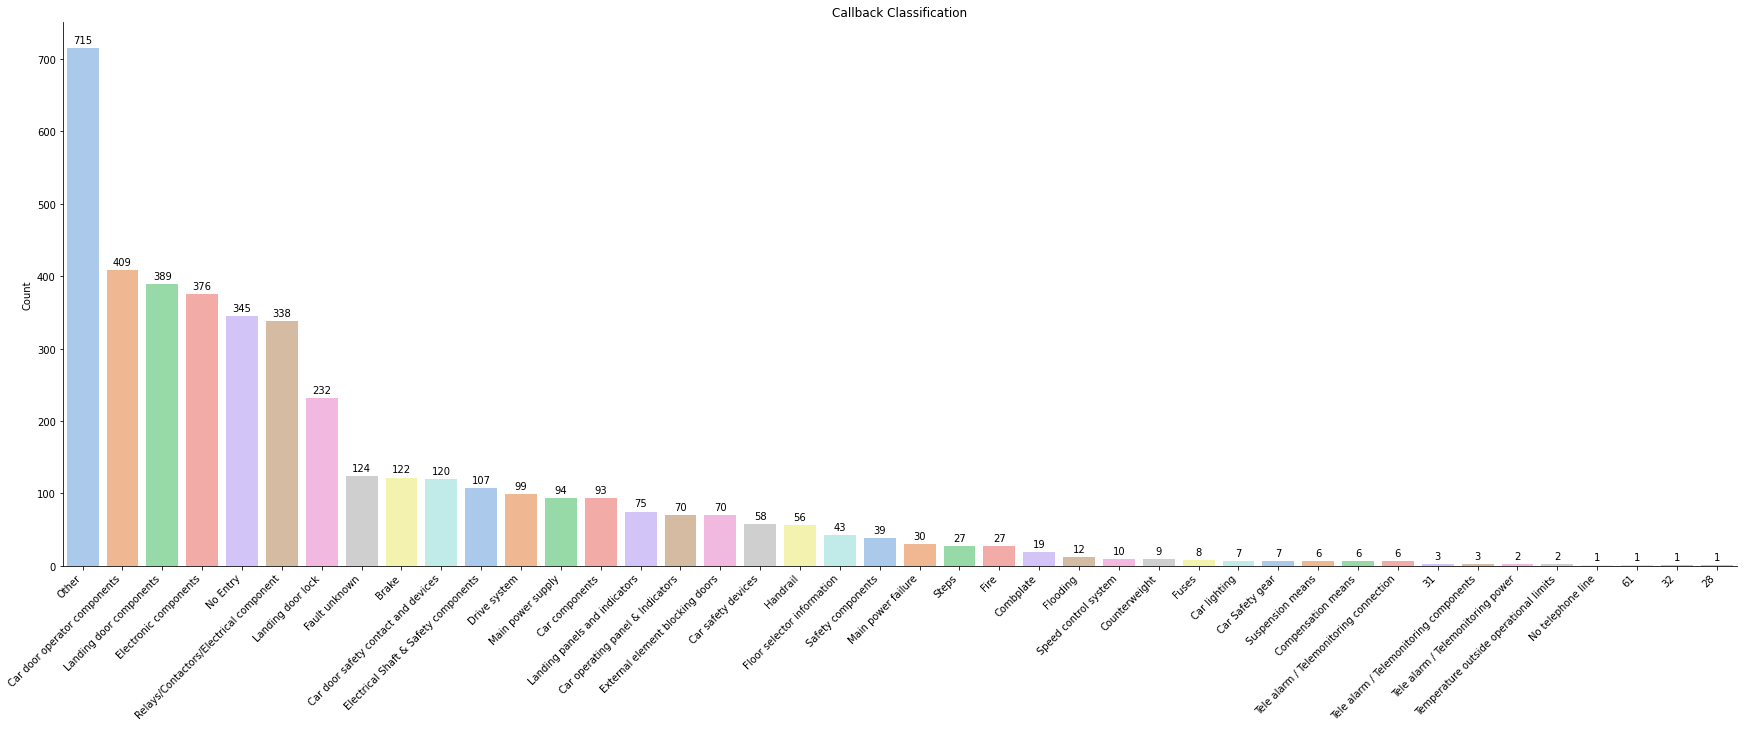

In [10]:
fig, ax = plt.subplots(figsize=(30,10))
g =sns.barplot(x='Callback Classification',y='Count',data=df_v ,ax=ax, palette='pastel')

plt.xticks(rotation=45, ha='right')
g.set_xlabel(' ')
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
g.set_title('Callback Classification')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 8), 
               textcoords = 'offset points')